In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 134 kB 56.8 MB/s 
     |████████████████████████████████| 88 kB 8.2 MB/s 
     |████████████████████████████████| 10.4 MB 41.6 MB/s 
     |████████████████████████████████| 3.3 MB 28.2 MB/s 
     |████████████████████████████████| 1.7 MB 60.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 65.9 MB/s 
     |████████████████████████████████| 636 kB 67.0 MB/s 
     |████████████████████████████████| 2.0 MB 61.6 MB/s 
     |████████████████████████████████| 262 kB 60.7 MB/s 
     |████████████████████████████████| 

In [3]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [1]:
cd /content/drive/MyDrive/ygrene/수방이작업실/

/content/drive/.shortcut-targets-by-id/1PK1OaPryLfu2eB3iega5z40yHx_idzuf/ygrene/수방이작업실


In [2]:
import numpy as np 
import pandas as pd
from time import time 
import pprint

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('./solar_slide_timeseriesed.csv',index_col=0)
data_x = data[data['datetime'] < '2022-05-01']
# data_y = data_x['target']
data_x = data_x.iloc[:,1:]

test_x = data[(data['datetime'] >= '2022-05-01') & (data['datetime'] < '2022-07-01')]
test_x.drop(['datetime','target'], axis=1, inplace=True)

In [8]:
data_x

,target,rain,sunshine,insolation,snow,cloud,floor_temp,dust,azimuth_x,azimuth_y,...,temperature,humidity,hour,month,day,Wx,Wy,DP,hour_mean_temp,month_mean_temp
0,0.00,1.0,0.0,0.00,0.0,10.0,21.2,37.0,-0.564891,0.825165,...,22.5,86.0,0.0,9.0,9.0,-1.349854,-1.608693,20.038955,10.776647,22.045069
1,0.00,1.0,0.0,0.00,0.0,10.0,21.4,36.0,-0.056057,0.998428,...,22.4,92.0,1.0,9.0,9.0,-2.121199,-2.527947,21.034790,10.526946,22.045069
2,0.00,1.0,0.0,0.00,0.0,10.0,20.4,33.0,0.493620,0.869678,...,20.4,82.0,2.0,9.0,9.0,-2.378314,-2.834364,17.221780,10.279042,22.045069
3,0.00,1.0,0.0,0.00,0.0,10.0,20.1,25.0,0.780925,0.624624,...,20.6,77.0,3.0,9.0,9.0,-1.414133,-1.685298,16.423867,10.057036,22.045069
4,0.00,0.0,0.0,0.00,0.0,10.0,20.2,19.0,0.901559,0.432656,...,21.1,80.0,4.0,9.0,9.0,-1.973355,-0.718242,17.512825,9.858533,22.045069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14347,0.85,0.0,0.0,0.11,0.0,10.0,18.2,44.0,-0.974490,0.224430,...,16.0,37.0,19.0,4.0,28.0,1.685298,-1.414133,1.300308,12.649551,12.998056
14348,0.00,0.0,0.0,0.01,0.0,9.0,16.8,34.0,-0.950433,0.310930,...,15.7,46.0,20.0,4.0,28.0,1.378880,-1.157018,4.101163,12.075599,12.998056
14349,0.00,0.0,0.0,0.00,0.0,9.0,16.2,31.0,-0.909882,0.414868,...,16.0,50.0,21.0,4.0,28.0,1.671248,1.991716,5.572908,11.655389,12.998056
14350,0.00,0.0,0.0,0.00,0.0,10.0,16.2,51.0,-0.837916,0.545799,...,16.3,57.0,22.0,4.0,28.0,1.026060,2.819078,7.759748,11.315719,12.998056


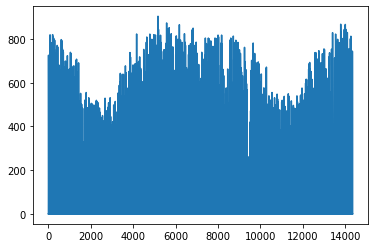

In [9]:
plt.plot(data_x['target'])

In [10]:
import jinja2
from pycaret.regression import *

In [11]:
exp_clf = setup(data = data_x, target = 'target', train_size = 0.9, session_id=1234)

,Description,Value
0,session_id,1234
1,Target,target
2,Original Data,"(14352, 26)"
3,Missing Values,False
4,Numeric Features,23
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12916, 25)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [12]:
model = compare_models(sort='MAE', fold=5, n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,44.1523,7312.9462,85.4844,0.8526,1.1693,10.1895,0.618
catboost,CatBoost Regressor,44.7915,6871.2017,82.8606,0.8614,1.5349,11.8917,8.872
xgboost,Extreme Gradient Boosting,45.3447,7361.1254,85.7688,0.8515,1.4463,6.7707,3.650
et,Extra Trees Regressor,48.5143,9262.1256,96.2240,0.8131,0.7894,7.1000,3.320
rf,Random Forest Regressor,48.6659,9279.8521,96.3228,0.8129,0.8082,6.9160,10.630
gbr,Gradient Boosting Regressor,55.6713,10417.1778,102.0290,0.7900,1.6402,15.6182,4.308
dt,Decision Tree Regressor,60.7946,17490.2360,132.2011,0.6473,1.0260,4.9469,0.216
ada,AdaBoost Regressor,65.7102,13570.6295,116.4710,0.7265,1.3926,31.5990,0.592
knn,K Neighbors Regressor,73.9981,15979.4498,126.3986,0.6779,1.8452,36.0133,0.226
br,Bayesian Ridge,82.1114,14324.2940,119.6697,0.7113,2.7014,29.7836,0.052


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), <catboost.core.CatBoostRegressor object at 0x7f8b319881d0>, XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rat

In [13]:
# 모델 튜닝 및 앙상블
# 모델 튜닝
tuned_model = [tune_model(i) for i in model]

# 모델 앙상블
blended_model = blend_models(estimator_list = tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,54.4632,9891.4716,99.4559,0.7907,1.5167,16.4587
1,62.5970,12988.7270,113.9681,0.7626,1.5703,33.7335
2,56.6821,10622.7991,103.0670,0.7952,1.4700,7.1236
3,57.5630,10753.6583,103.6998,0.7884,1.5385,5.8399
4,55.3337,10792.4770,103.8868,0.7671,1.5561,20.8102
5,54.1685,9982.2049,99.9110,0.8039,1.5168,11.2067
6,55.8647,10581.5879,102.8668,0.7929,1.4996,23.0933
7,55.9345,11173.6337,105.7054,0.7657,1.5004,13.3621
8,56.4333,10700.4942,103.4432,0.7733,1.6108,16.5510


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 6
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0,
                    min_impurity_split=None, min_samples_leaf=5,
                    min_samples_split=7, min_weight_fraction_leaf=0.0,
                    n_estimators=160, n_jobs=-1, oob_score=False,
                    random_state=1234, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................
INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:40:46
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Random Forest Regressor
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 19.2min


KeyboardInterrupt: ignored

In [ ]:
# 모델 성능평가
final_model = finalize_model(blended_model)
prediction = predict_model(final_model, data=test_x)

In [ ]:
prediction_pred = pd.DataFrame(prediction)
prediction_pred.to_csv('./predict_answer/wind_baseline_pycaret.csv')